# Lista 3


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

/home/victor/.conda/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def one_hot_encode(x, num_classes):
    one_hot = np.zeros([len(x), num_classes])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

In [3]:
### leitura do dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

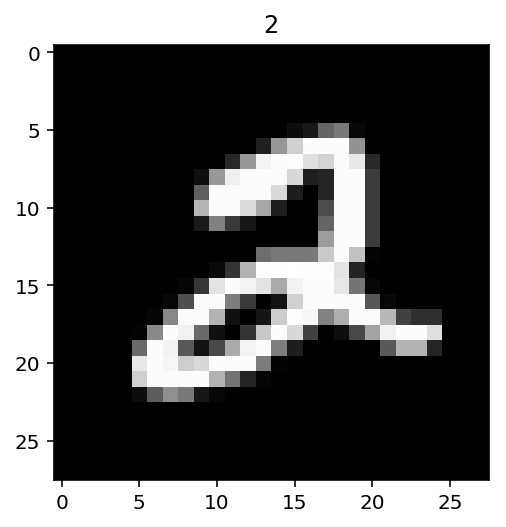

In [4]:
### Visualizar instâncias
plt.imshow(train_X[5], cmap=plt.get_cmap('gray'))
plt.title(train_y[5])

In [5]:
# Normaliza as instâncias
train_X = train_X.astype(np.float32)
train_X /= 255.0

test_X = test_X.astype(np.float32)
test_X /= 255.0

In [6]:
# Flatteniza as instâncias
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])

In [7]:
# One Hot Encode nas classes
train_y = one_hot_encode(train_y, 10)
test_y = one_hot_encode(test_y, 10)

# Rede Neural 1

- Camada 1: 28
- Dropout: 20%
- Camada 2: 14
- Dropout: 20%
- Gradient Descent Optimizer
- 300 epochs

In [15]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 100
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 28                 # Number of hidden nodes
h_size2 = 14                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
keep_prob = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, y_size)))
b3 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, keep_prob)
hidden_output2 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, keep_prob)
final_output = tf.nn.softmax(tf.add(tf.matmul(dropout2, w3), b3), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, keep_prob:0.8})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, keep_prob:1})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 28149.379
Epoch 1 | Batch 0 | Train Loss: 14182.778
Epoch 2 | Batch 0 | Train Loss: 12728.349
Epoch 3 | Batch 0 | Train Loss: 12249.076
Epoch 4 | Batch 0 | Train Loss: 11850.314
Epoch 5 | Batch 0 | Train Loss: 11455.006
Epoch 6 | Batch 0 | Train Loss: 11077.789
Epoch 7 | Batch 0 | Train Loss: 10714.214
Epoch 8 | Batch 0 | Train Loss: 10380.445
Epoch 9 | Batch 0 | Train Loss: 10063.965
Epoch 10 | Batch 0 | Train Loss: 9786.058
Epoch 11 | Batch 0 | Train Loss: 9530.778
Epoch 12 | Batch 0 | Train Loss: 9292.736
Epoch 13 | Batch 0 | Train Loss: 9065.128
Epoch 14 | Batch 0 | Train Loss: 8857.803
Epoch 15 | Batch 0 | Train Loss: 8665.225
Epoch 16 | Batch 0 | Train Loss: 8479.154
Epoch 17 | Batch 0 | Train Loss: 8304.323
Epoch 18 | Batch 0 | Train Loss: 8138.7627
Epoch 19 | Batch 0 | Train Loss: 7984.514
Epoch 20 | Batch 0 | Train Loss: 7837.4326
Epoch 21 | Batch 0 | Train Loss: 7697.8096
Epoch 22 | Batch 0 | Train Loss: 7572.13
Epoch 23 |

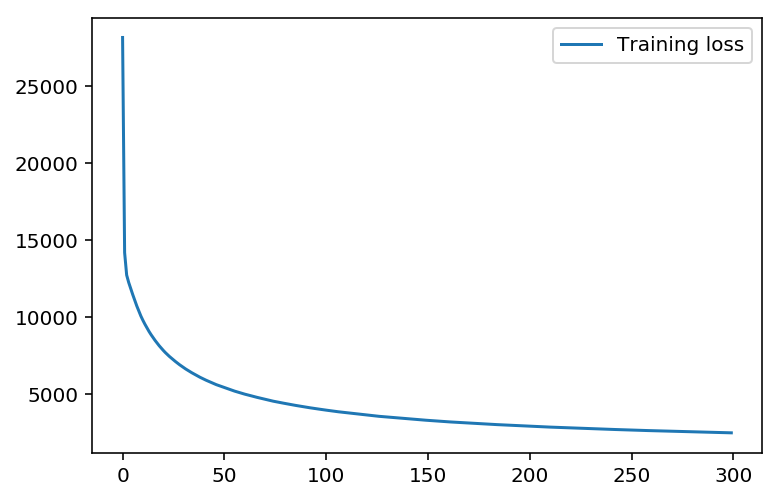

In [16]:
# Rede Neural 1 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [17]:
# Rede Neural 1 - Accuracy and Confusion Matrix
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], keep_prob:1})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))
    

Accuracy: 0.881
Confusion Matrix:
[[ 940    0    3    3    0   11   16    6    1    0]
 [   0 1104    5    5    0    1    3    2   15    0]
 [  15   12  889   19   17    0   29   21   28    2]
 [   6    2   30  870    0   44    3   20   25   10]
 [   1    0    7    0  846    1   17    2    5  103]
 [  39    3   16   67    8  669   25   17   38   10]
 [  14    3    9    1    8   12  907    1    2    1]
 [   1   12   21    5    4    0    0  958    4   23]
 [  11    8   26   38    8   42   18   13  789   21]
 [   9    4    9   10   59    7    4   59   10  838]]


# Rede Neural 2

- Camada 1: 28
- Dropout: 20%
- Camada 2: 14
- Dropout: 20%
- Adam optimizer
- 300 epochs

In [8]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 100
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 28                 # Number of hidden nodes
h_size2 = 14                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
keep_prob = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, y_size)))
b3 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, keep_prob)
hidden_output2 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, keep_prob)
final_output = tf.nn.softmax(tf.add(tf.matmul(dropout2, w3), b3), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, keep_prob:0.8})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, keep_prob:1})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 28644.812
Epoch 1 | Batch 0 | Train Loss: 15996.815
Epoch 2 | Batch 0 | Train Loss: 12618.163
Epoch 3 | Batch 0 | Train Loss: 10867.411
Epoch 4 | Batch 0 | Train Loss: 9583.787
Epoch 5 | Batch 0 | Train Loss: 8496.94
Epoch 6 | Batch 0 | Train Loss: 7655.289
Epoch 7 | Batch 0 | Train Loss: 7003.118
Epoch 8 | Batch 0 | Train Loss: 6428.6055
Epoch 9 | Batch 0 | Train Loss: 5870.904
Epoch 10 | Batch 0 | Train Loss: 5344.051
Epoch 11 | Batch 0 | Train Loss: 4921.3413
Epoch 12 | Batch 0 | Train Loss: 4551.4795
Epoch 13 | Batch 0 | Train Loss: 4236.0474
Epoch 14 | Batch 0 | Train Loss: 3978.3586
Epoch 15 | Batch 0 | Train Loss: 3722.338
Epoch 16 | Batch 0 | Train Loss: 3504.0044
Epoch 17 | Batch 0 | Train Loss: 3317.868
Epoch 18 | Batch 0 | Train Loss: 3151.0835
Epoch 19 | Batch 0 | Train Loss: 3012.1829
Epoch 20 | Batch 0 | Train Loss: 2898.8152
Epoch 21 | Batch 0 | Train Loss: 2794.8638
Epoch 22 | Batch 0 | Train Loss: 2709.2195
Epoch 23

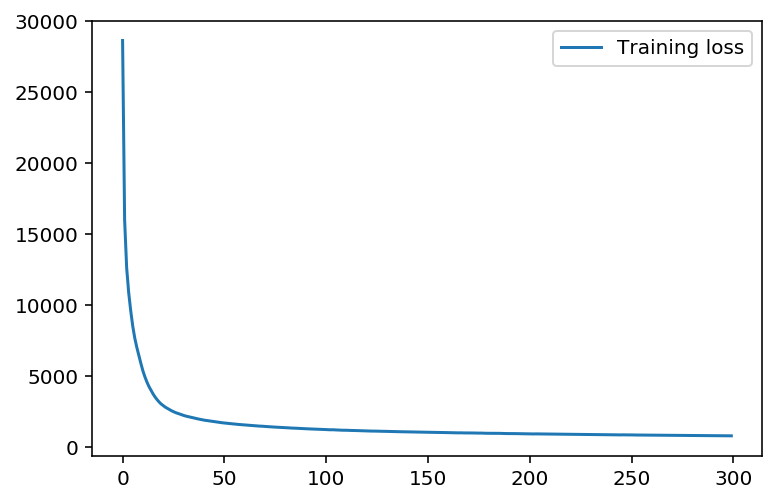

In [9]:
# Rede Neural 1 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [10]:
# Rede Neural 1 - Accuracy and Confusion Matrix
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], keep_prob:1})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))
    

Accuracy: 0.9449
Confusion Matrix:
[[ 964    0    1    2    0    2    8    2    1    0]
 [   0 1114    1    5    1    1    5    1    7    0]
 [  11    4  955   11   12    2   11   13   12    1]
 [   1    0   17  948    1   17    0   14   10    2]
 [   2    1    0    1  943    0   11    1    3   20]
 [  13    2    2   26    8  810    9    2   14    6]
 [  10    4    1    0    4    4  930    1    4    0]
 [   2    5   14   10    9    1    0  969    0   18]
 [   5    8    7   11   12    9   12   11  895    4]
 [   6    5    0    6   36   11    2    9   13  921]]


### Rede Neural 3

- Camada 1: 28
- Dropout: 20%
- Camada 2: 14
- Dropout: 20%
- Adam optimizer
- 300 epochs

In [18]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 100
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 28                 # Number of hidden nodes
h_size2 = 14                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
keep_prob = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, y_size)))
b3 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.tanh(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, keep_prob)
hidden_output2 = tf.nn.tanh(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, keep_prob)
final_output = tf.nn.softmax(tf.add(tf.matmul(dropout2, w3), b3), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, keep_prob:0.8})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, keep_prob:1})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 36324.848
Epoch 1 | Batch 0 | Train Loss: 20258.15
Epoch 2 | Batch 0 | Train Loss: 14449.803
Epoch 3 | Batch 0 | Train Loss: 11471.044
Epoch 4 | Batch 0 | Train Loss: 9748.501
Epoch 5 | Batch 0 | Train Loss: 8604.702
Epoch 6 | Batch 0 | Train Loss: 7732.7705
Epoch 7 | Batch 0 | Train Loss: 7069.3643
Epoch 8 | Batch 0 | Train Loss: 6540.392
Epoch 9 | Batch 0 | Train Loss: 6099.5576
Epoch 10 | Batch 0 | Train Loss: 5741.618
Epoch 11 | Batch 0 | Train Loss: 5449.173
Epoch 12 | Batch 0 | Train Loss: 5189.8022
Epoch 13 | Batch 0 | Train Loss: 4958.749
Epoch 14 | Batch 0 | Train Loss: 4761.099
Epoch 15 | Batch 0 | Train Loss: 4587.2524
Epoch 16 | Batch 0 | Train Loss: 4440.029
Epoch 17 | Batch 0 | Train Loss: 4300.7686
Epoch 18 | Batch 0 | Train Loss: 4168.1475
Epoch 19 | Batch 0 | Train Loss: 4045.4668
Epoch 20 | Batch 0 | Train Loss: 3935.371
Epoch 21 | Batch 0 | Train Loss: 3820.3433
Epoch 22 | Batch 0 | Train Loss: 3734.8188
Epoch 23 

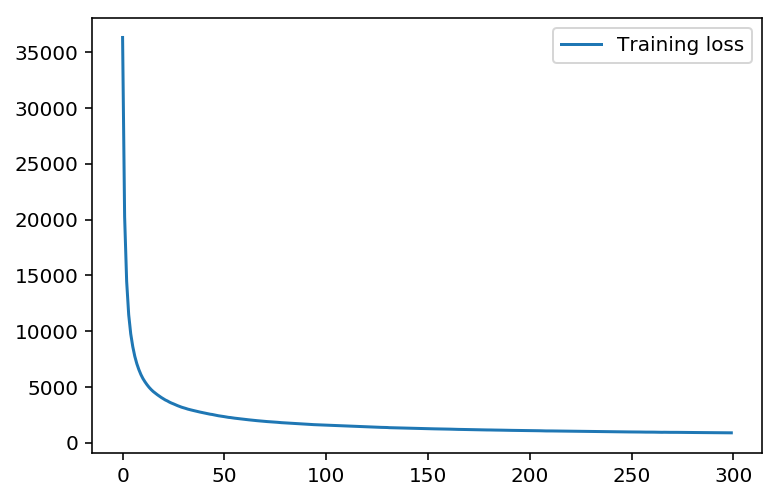

In [19]:
# Rede Neural 1 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [20]:
# Rede Neural 1 - Accuracy and Confusion Matrix
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], keep_prob:1})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))
    

Accuracy: 0.9379
Confusion Matrix:
[[ 966    0    0    1    0    5    6    1    0    1]
 [   0 1117    4    2    0    1    4    3    4    0]
 [  13    1  950   14    7    0   10   10   22    5]
 [   2    1   23  921    0   34    0   13   15    1]
 [   1    3    5    0  930    0   11    1    2   29]
 [   6    3    4   35    1  799   12    2   25    5]
 [  10    2    8    1    9    9  914    0    5    0]
 [   2    9   15    5    5    0    0  966    2   24]
 [   4    7    6   13    8   16    8   11  896    5]
 [   8    4    1    9   31    9    0   16   11  920]]


# Rede Neural 4

- Camada 1: 98
- Dropout: 20%
- Camada 2: 49
- Dropout: 20%
- Adam Optimizer

In [11]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 100
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 98                 # Number of hidden nodes
h_size2 = 49                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
keep_prob = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, y_size)))
b3 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, keep_prob)
hidden_output2 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, keep_prob)
final_output = tf.nn.softmax(tf.add(tf.matmul(dropout2, w3), b3), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, keep_prob:0.8})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, keep_prob:1})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 50866.336
Epoch 1 | Batch 0 | Train Loss: 12541.589
Epoch 2 | Batch 0 | Train Loss: 8056.3623
Epoch 3 | Batch 0 | Train Loss: 5966.057
Epoch 4 | Batch 0 | Train Loss: 4801.079
Epoch 5 | Batch 0 | Train Loss: 4094.6648
Epoch 6 | Batch 0 | Train Loss: 3636.7625
Epoch 7 | Batch 0 | Train Loss: 3299.5898
Epoch 8 | Batch 0 | Train Loss: 3041.8176
Epoch 9 | Batch 0 | Train Loss: 2844.132
Epoch 10 | Batch 0 | Train Loss: 2659.8218
Epoch 11 | Batch 0 | Train Loss: 2520.7898
Epoch 12 | Batch 0 | Train Loss: 2396.3853
Epoch 13 | Batch 0 | Train Loss: 2289.28
Epoch 14 | Batch 0 | Train Loss: 2190.1367
Epoch 15 | Batch 0 | Train Loss: 2112.8674
Epoch 16 | Batch 0 | Train Loss: 2014.7686
Epoch 17 | Batch 0 | Train Loss: 1955.723
Epoch 18 | Batch 0 | Train Loss: 1898.1042
Epoch 19 | Batch 0 | Train Loss: 1832.8961
Epoch 20 | Batch 0 | Train Loss: 1781.3629
Epoch 21 | Batch 0 | Train Loss: 1723.6367
Epoch 22 | Batch 0 | Train Loss: 1672.8278
Epoch

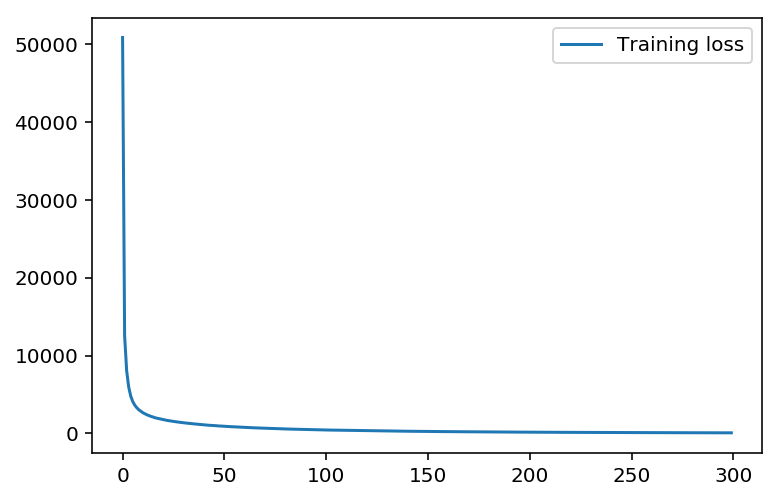

In [12]:
# Rede Neural 2 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [13]:
# Rede Neural 2 - Accuracy and Confusion Matrix
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], keep_prob:1})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))

Accuracy: 0.9709
Confusion Matrix:
[[ 966    0    1    1    1    1    4    3    2    1]
 [   0 1122    4    1    1    1    3    0    3    0]
 [   5    2  998    9    4    0    3    7    3    1]
 [   0    0    4  978    0   11    0   10    3    4]
 [   1    0    3    1  955    0    5    3    1   13]
 [   4    1    0   14    0  861    7    2    1    2]
 [   6    2    3    0    6    4  935    0    2    0]
 [   2    3    9    3    1    0    0 1000    1    9]
 [   4    1    4   11    4    5    2    6  935    2]
 [   5    4    0    8   17    1    2   11    2  959]]


# Rede Neural 5

In [21]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 100
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 98                 # Number of hidden nodes
h_size2 = 98                # Number of hidden nodes
h_size3 = 49                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
keep_prob = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, h_size3)))
b3 = tf.Variable(tf.random_normal(shape=[h_size3]))
w4 = tf.Variable(tf.random_normal(shape=(h_size3, y_size)))
b4 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, keep_prob)
hidden_output2 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, keep_prob)
hidden_output3 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w3), b3))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output3, w4), b4), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, keep_prob:0.8})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, keep_prob:1})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 35147.39
Epoch 1 | Batch 0 | Train Loss: 10246.966
Epoch 2 | Batch 0 | Train Loss: 6600.4907
Epoch 3 | Batch 0 | Train Loss: 4998.9688
Epoch 4 | Batch 0 | Train Loss: 4085.146
Epoch 5 | Batch 0 | Train Loss: 3504.7788
Epoch 6 | Batch 0 | Train Loss: 3104.4302
Epoch 7 | Batch 0 | Train Loss: 2815.1646
Epoch 8 | Batch 0 | Train Loss: 2589.6143
Epoch 9 | Batch 0 | Train Loss: 2416.9844
Epoch 10 | Batch 0 | Train Loss: 2271.4834
Epoch 11 | Batch 0 | Train Loss: 2145.4631
Epoch 12 | Batch 0 | Train Loss: 2051.1265
Epoch 13 | Batch 0 | Train Loss: 1952.0934
Epoch 14 | Batch 0 | Train Loss: 1864.5283
Epoch 15 | Batch 0 | Train Loss: 1789.9297
Epoch 16 | Batch 0 | Train Loss: 1736.4254
Epoch 17 | Batch 0 | Train Loss: 1666.0898
Epoch 18 | Batch 0 | Train Loss: 1613.0906
Epoch 19 | Batch 0 | Train Loss: 1560.9364
Epoch 20 | Batch 0 | Train Loss: 1514.926
Epoch 21 | Batch 0 | Train Loss: 1471.7117
Epoch 22 | Batch 0 | Train Loss: 1432.2693
Ep

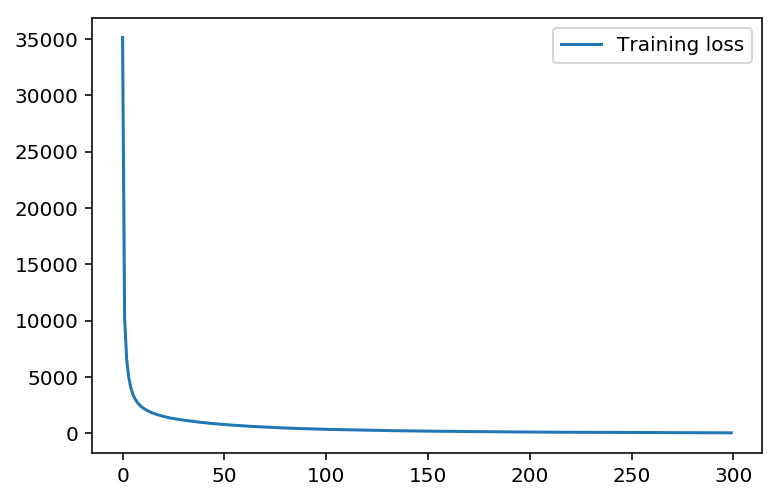

In [22]:
# Rede Neural 3 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [23]:
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], keep_prob:1})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))

Accuracy: 0.9718
Confusion Matrix:
[[ 968    0    1    1    0    6    1    2    1    0]
 [   0 1122    2    1    0    0    4    2    4    0]
 [   5    3  996    5    5    4    3    7    4    0]
 [   0    0    3  978    0   11    0    9    5    4]
 [   1    0    4    0  962    1    5    1    1    7]
 [   3    1    0   10    3  861    5    1    4    4]
 [   4    2    1    0    2    7  938    0    4    0]
 [   0    5    8    2    0    0    0 1003    1    9]
 [   3    1    7    5    7    8    5    5  931    2]
 [   3    5    1    5   19    9    0    5    3  959]]


### Definição de Topologia da Rede
Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:

- Quantos neurônios serão utilizados em cada camada?
- Quantas camadas serão utilizadas?
- É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
<br><font color=red>Só usamos Dropout para minimizar possível overfitting</font>
- Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos
<br><font color=red>Nas camadas ocultas usamos tanto Sigmoid como Tanh. Por se tratar de um problema de multi-classiificação, optamos por usar Softmax na saída de todas as arquiteturas.</font>

### Definir otimizador, função custo e modo do treinamento
Uma Rede Neural é um problema de otimização, sabendo disso, explique:
<br>
- Qual otimizador será utilizado? Escolha dois otimizadores, explique a diferença entre eles justificando a escolha e comente os resultados obtidos.
<br><font color=red>O otimizador Adam, como tem momento e tamanho de passo efetivo, conseguiu convergir bem mais rápido que o gradiente descendente, por isso foi escolhido nas demais arquiteturas.</font>
- Será necessário utilizar uma função custo? Explique o que é uma função custo e qual será utilizada justificando a escolha.
<br><font color=red>Claro. Afinal o otimizador precisa otimizar alguma coisa. A função utlizada foi a cross entropy loss.</font>
- Qual modo de treinamento foi utilizado? Justifique sua resposta
<br><font color=red>Mini-batch. Possui ótimo tradeoff entre treinamento rápido e capacidade de evitar mínimos locais pela sua estocasticidade.</font>
- Quantas épocas serão necessárias? Caso os métodos por batch ou mini-batch sejam escolhidos, indique também o tamanho</font>
<br><font color=red>Quanto maior o batch mais épocas são necessárias.</font>